# Notebook E-tivity 3 CE4021 Task 1

Student name: Peter O'Mahony

Student ID: 8361967

# Task Statement
Write code to simulate rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

Using Etivity3-Task1.ipynb from the Gitlab repository: 

* Briefly explain the type of random variable and probability distribution you will use. The choice of a continuous or a discrete random variable, and the probability distribution (normal, uniform, binomial, ..) should be informed by the type of experiment.
* Write Python code to simulate the experiment. The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:
    - The expected value of your random variable.
    - The standard deviation of your random variable.
    - Plot the distribution found in your simulated experiment with an appropriate number of 'bins'

# My Initial Thoughts
I'm not planning to run a Theme Park at present and I'm way too honest to dabble with a biased coin (or I can't find one quickly enough online) so Option 1 sounds most interesting and useful for whenever get to Vegas.

Is rolling two dice numbered 1 to 6 the same as rolling one die numbered 1 to 12?  If so, then there are 4 outcomes we are interested in: 1, 2, 11 and 12.  There are 1/12 chances of each so, intuitively and without the benefits of an education in probability, 4/12 (or 0.3333) seems to be the probability of rolling one of those.

What is meant by "the type of random variable"? What types are there? Is it simply the range of the variable or the data type?  In this case it could be "a random integer between 1 and 6" to simulate a die throw.  The outcomes are Discrete so that will inform the type of distribution.

Do I need a probability distribution to simulate this or is brute force an option?

# Later thoughts
Of course two dice are not the same as one because we can throw a 1 on a 1 to 12 die and that is impossible with 2 dice.  The results of my initial graphing experiment on a 12 sided die showed me that that theory was rubbish and I'm mortified.

Reminder notes on types of distributions:

Binomial Distribution requires:
- 2 potential outcomes per trial
- probability of success (p) is the same for each trial
- number of trials (n) is fixed
- each trial is independent
- has discrete data points?
- has a finite amount of events

Normal Distribution requires:
- has continuous data points
- Central Limit Theory: as n increases the distribution of the sample mean or sum approaches a normal distribution

Uniform Distribution requires:
- every value between an interval from a to b is equally likely to occur.


# Mature thoughts
I've been thinking about this task and considering the purpose of it.  I've stepped back from the maths and looked at the practicalities of an experiment.  In general, sciencey heads imagine something and start to believe it might be true and then set about trying to prove it is not true.  Another approach is to experiment and document the results and repeat, repeat, repeat and look for a pattern.  And then try to prove it is not a pattern.

So my approach will be to try to predict the outcome as follows.  I determined that the number of times that the sum of the two dice is less than 3 or more than 10 will be 4 times in 36 throws because:

- The dice are independent - the result on the first die has no influence on the result of the second.
- There are 6 possible outcomes on the first die and 6 on the second so there are 36 possible outcomes of throwing 2 dice.
- Four of those outcomes are of interest: (1,1) is the only outcome less than 3 and (5,6), (6,5) and (6,6) are the only outcomes whose sum is more than 10.

I therefore expect the result of my experiment to show that, as the number of throws increases, the result of the sum of the outcomes of interest should tend towards 4/36 or 1/9 or 0.1111.  This is the application of the [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers)

# Note on Draft
This Notebook needs to be reformatted into the required arrangement of Cells as prescribed by the Task.  In its current format, it reflects the order of thought evolution and it contains experiments to explore the task - these will be removed and the result will be, um, less storylike.

# Start of Proper Introduction
This task requires the throwing of dice, the outcome of which is a finite set of integers and that suggests that our distribution will be discrete rather than continuous.  A fair die has an equal probability of landing on any of its faces (or backsides depending on how you use the terminology) which suggests that to simulate this, we need a uniform distribution of random numbers over the space of possible outcomes.

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

You may add as many cells as you require to complete the task.

In [2]:
"""
Define the global constants: Two six faced dice but make it easy to play with different numbers.
"""
faces = 6
dice = 2
dice_range = dice*faces

# get the same sequence of random numbers every time so I have consistent commentary
# comment this out for an exciting new sequence every time
random.seed('iveseenthefuturebaby') 

In [3]:
def throw_dice() -> int:
    """
    Simulate the throwing of two 6 sided dice and return the sum of their faces.
    """
    # generate two uniformly random integers between 1 and faces and sum them
    # I could use a loop to handle more dice
    return random.randint(1,faces) + random.randint(1,faces)

In [29]:
def initialise_result_bins() -> dict[int]:
    """
    Return a dictionary object containing bins for each of the possible results of throwing
    'dice' 'faces' dice where, for this instance, dice is 2 and faces is 6.
    """
    # How can I make a loop arrangement that would do this for any number of dice and faces?
    bins = {}
    for i in range(dice, dice_range+1):
        bins[i] = 0
    return bins

In [49]:
def plot_distribution(hist: list, graph_title: str = '') -> None:
    """
    Draw a bar chart showing each combination of the dice and a count of the number of times
    that combination is thrown.
    """
    interv = range(dice, dice_range+1, 1)
    plt.bar(interv, hist.values(), color='darkgreen')
    plt.title(graph_title)
    plt.xlabel('Sum of Dice')
    plt.ylabel('Number of Times')
    plt.xticks(range(dice, dice_range+1), color='green')

    # draw horizontal lines across the left side results to make it easier to compare with the 
    # potentially symmetric other side of the bump
    for line in range(dice, faces+1):
        plt.axhline(y=hist[line], color='yellowgreen', alpha=0.5)
    

In [50]:
def predict_distribution() -> None:
    """
    Calculate all the possible permutations of the result for n dice and graph them.
    """
    possible_result = initialise_result_bins()

    for face1 in range(1, faces+1):
        for face2 in range(1, faces+1):
            possible_result[face1+face2] += 1
    plot_distribution(possible_result, 'Predicted Permutations of Outcome')
            

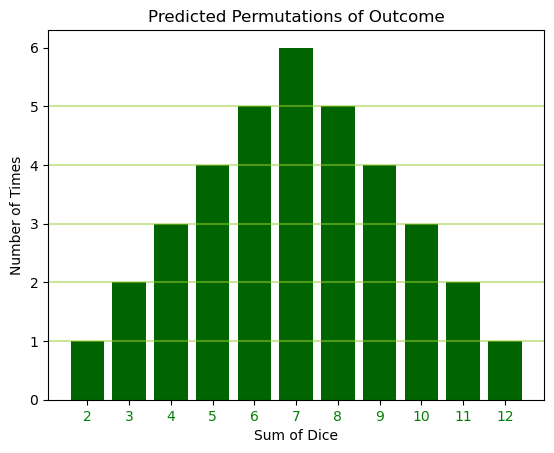

In [51]:
predict_distribution()

In [36]:
def go_roll_crazy(no_of_times: int) -> dict[int:int]:
    """
    This will throw a pair of dice no_of_times times and record the sum of the result in a dictionary.
    The dictionary is in the format dict[result:count] where result is the sum of two dice and count
    is the number of times that result was given.
    """
    # initialise the dictionary for outcome range 2-12
    hist = initialise_result_bins()

    for i in range(0, no_of_times):
        thrown = throw_dice()  # random.randint(1,rand_range)
        hist[thrown] += 1
    return hist

In [37]:
def analyse_symmetry(distrib: dict[int:int]) -> float:
    """
    Calculate the biggest difference in the symmetry of a distribution.
    This compares the values on both sides of the median and finds the maximum difference
    and expresses it as a proportion of the number of throws.  This could be considered a 
    symmetric margin of error and the lower the value the more reliable the experiment for 
    that number of throws (and random seed).
    """
    max_diff = 0
    for i in range(dice, len(distrib)//2):
        diff = abs(distrib[i] - distrib[dice_range-i+dice])
        if (diff>max_diff):
            max_diff = diff
    return max_diff/sum(distrib.values())
    

In [38]:
def perform_experiment(throws: int = 50000):
    distrib = go_roll_crazy(throws)
    less_than_3 = distrib[2]
    more_than_10 = distrib[11] + distrib[12]
    chances = (less_than_3+more_than_10)/throws
    print(f'Experimental Result ({less_than_3}+{more_than_10})/{throws}: {chances}')
    print(f'Calculated Probability: {1/9:.5f}')
    print(f'Symmetric margin of error: {analyse_symmetry(distrib):.4f}')
    plot_distribution(distrib, f'{throws} Throws')
    #mean = np.mean(list(distrib.values()))
    #std = np.std(list(distrib.values()))
    #print('mean', mean)
    #print('stddev', std)


### Perform the Experiment
We now throw the dice many, many times and count the number of times each result occurs. Then we graph the outcome which shows an impressive and suggestively symmetric distribution. What shall we call it?

We draw horizontal lines to visually test the symmetry but also use our sexy maths knowledge to measure the variance (careful of terminology now) somehow.  I subtract the bars on either side of the peak (7) and note the maximum difference.  If it was perfectly symmetric then this value would be zero but, in reality, that would be extraordinary in this experiment. By dividing that maximum by the number of throws we can get a measure of symmetry. There are probably better ones but this makes sense to me anyway.

TODO: I think it will somehow be important to first calculate the expected Standard Deviation of this experiment if such a thing is possible and then calculate it for various ranges of throws.  Finally some commentary on the distribution will be important.

Experimental Result (1473+4181)/50000: 0.11308
Calculated Probability: 0.11111
Symmetric margin of error: 0.0025


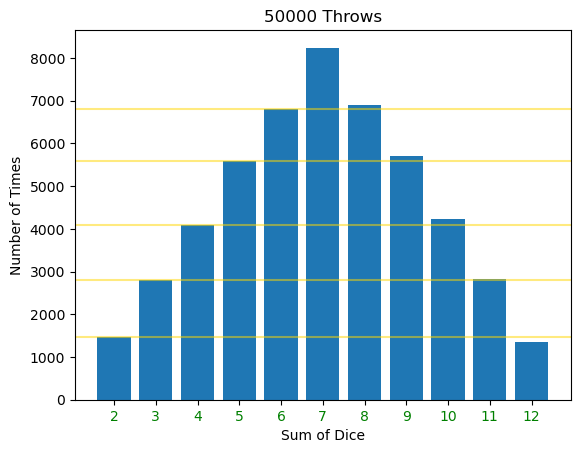

In [39]:
distrib = perform_experiment()

### Convergence
I think this is the most interesting part of the Task and it may not even be required.  Ultimately, I want to find the minimum number of throws to achieve the maximum convergence with my predicted value.  The Convergence activity below plots three experimental ranges and I will comment on these in my Reflection.

In [12]:
def show_convergence(start: int = 1000, step: int = 1000, end: int = 50000, selected_stability_point: int = 10000) -> None:
    """
    Calculate and graph the effect of throwing dice many times to determine a pattern.
    This will roll the dice up to 'end' times and graph the value of the frequency that our outcome of interest
    (sum of the two dice is less than 3 or more than 10) occurs.  The graph interval starts at 'start' rather
    than zero because we need to throw the dice quite a lot before the outcomes start to form a useful pattern.
    
    The selected_stability_point is an arbitrary number of throws selected by the analyst (you) after which we
    want to record the highest and lowest values of outcomes.  This will help the analyst determine a reasonable
    number of throws to get an acceptable level of accuracy.
    
    The graph indicates the selected stability point and the accuracy range thereafter.
    """
    prob = []
    exp_range = range(start, end, step)
    for exp in exp_range:
        distrib = go_roll_crazy(exp)
        # the values of interest will need to be changed if the number of dice or faces changes
        interest = (distrib[2] + distrib[11] + distrib[12])/exp
        prob.append(interest)

    interv = range(1,dice_range+1,1)

    # find the min and max after a specific size of samples
    start_sample = round(selected_stability_point/step)-1
    d_min = min(prob[start_sample:])
    d_max = max(prob[start_sample:])
    print('# Graph Samples: ',len(prob))
    
    # use all the horizontal space for our graph
    figure, axis = plt.subplots(1, 1)
    figure.set_size_inches(12, 5)
    axis.set_ylim([0.09, 0.13])
    plt.plot(exp_range, prob, label='Experimental Probability')
    plt.axhline(y=1/9, color='r', linestyle='--',label='Calculated Probability')

    plt.axvline(exp_range[start_sample], color='b', linestyle='--',label=f'Selected Stability Point')
    plt.axhline(y=d_min, color='y', linestyle=':',label=f'Min={d_min:.4f}')
    plt.axhline(y=d_max, color='g', linestyle=':',label=f'Max={d_max:.4f}')
    plt.legend()
    plt.show()


# Graph Samples:  19


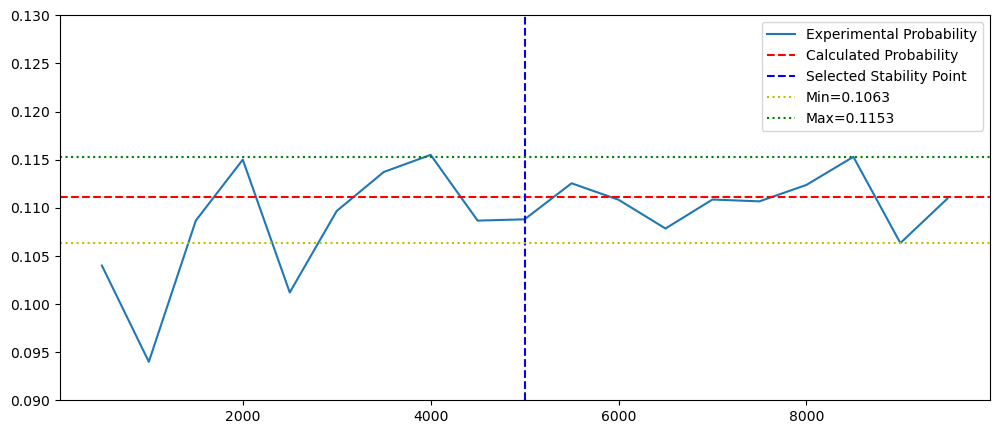

In [13]:
# What is the minimum number of throws I can make to determine a reasonable estimate of the frequency of my
# outcome of interest which is predicted to be 0.1111?
show_convergence(start= 500, step= 500, end= 10000, selected_stability_point=  5000)

# Graph Samples:  49


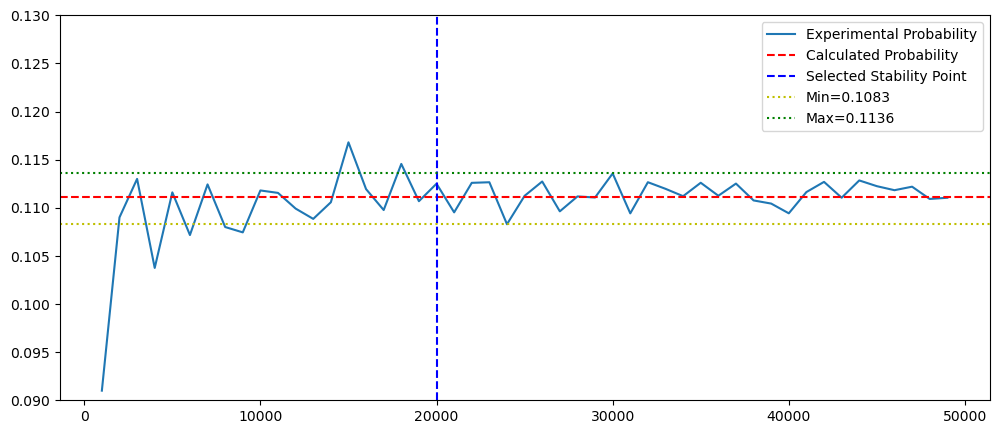

In [14]:
show_convergence(start=1000, step=1000, end= 50000, selected_stability_point= 20000)

# Graph Samples:  59


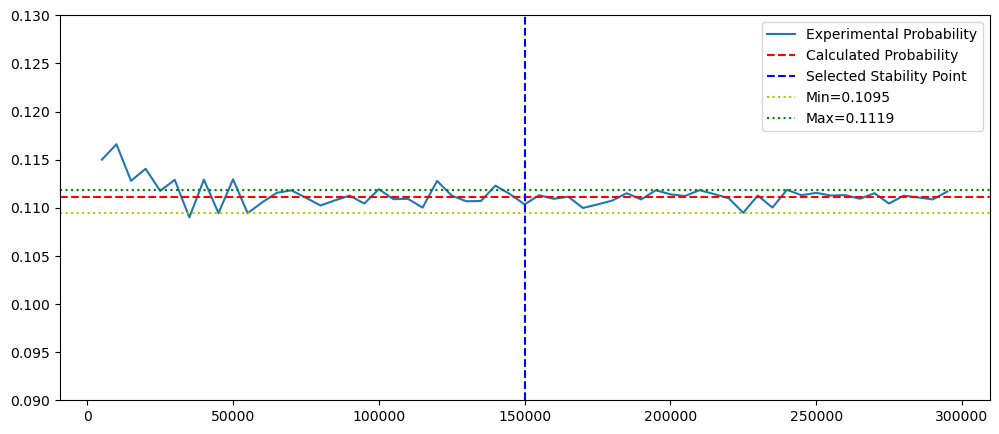

In [15]:
show_convergence(start=5000, step=5000, end=300000, selected_stability_point=150000)

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

TBD

(Pep said we can just use a uniform distribution for each of the dice and implement your experiment. The outcome of the experiment can be checked by listing all potential outcomes and their probabilities.)